# Defining the Stellar Spectrum

In this notebook we provide some examples showing how archNEMESIS can be used to define the stellar spectrum for an atmospheric retrieval. 

The main input file for the standard version of NEMESIS is the *.sol* file, which just includes one line with the name of the file where the solar spectrum is stored. Note this file must be defined in a specific format and it is expected to be stored in *Data/stellar/*.

On the other hand, in archNEMESIS the information about the solar spectrum is directly written into the input HDF5 file (rather than just using the HDF5 as a pointer to another file). 

While the retrievals from archNEMESIS will typically use the input HDF5 file, we also include some built-in methods in the Stellar class to read/write the *.sol* file and use archNEMESIS as a post or pre-processing tool for standard NEMESIS retrievals.

In [1]:
import archnemesis as ans
import matplotlib.pyplot as plt

## 1. Reading the stellar spectrum from the input file

### Reading the stellar spectrum from the *.sol* file

In this example we show how we can use the Stellar class to read the information about the solar spectrum. Here, we are going to create an example *.sol* file pointing at one of the stellar spectra stored in */Data/stellar/*, and we are going to read the file with the Stellar class. Note that the actual file where the stellar spectrum is stored must have a defined format as specified by NEMESIS.

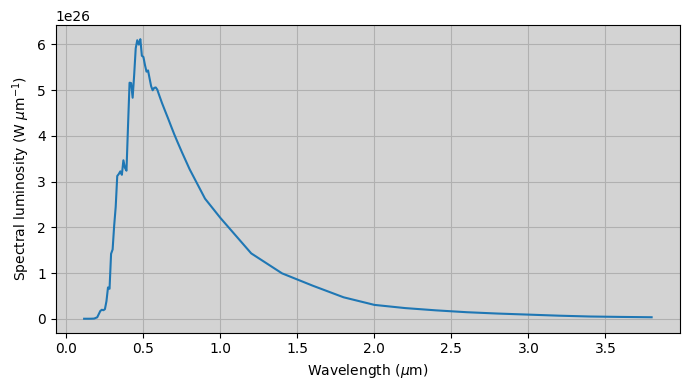

In [2]:
#Writing arbitrary .sol file
###############################################################
f = open('example.sol','w')
f.write('houghtonsolar_corr_wl.dat')   #Name of the file containing the information about the solar spectrum
f.close()

#Initialising stellar class and reading .sol file
###############################################################

Stellar = ans.Stellar_0()
Stellar.read_sol('example')

#Making summary plot
###############################################################

fig,ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(Stellar.WAVE,Stellar.SOLSPEC)
ax1.grid()
if Stellar.ISPACE==0:
    ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax1.set_ylabel('Spectral luminosity (W (cm$^{-1}$)$^{-1}$)')
elif Stellar.ISPACE==1:
    ax1.set_xlabel('Wavelength ($\mu$m)')
    ax1.set_ylabel('Spectral luminosity (W $\mu$m$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

### Reading the stellar spectrum from the HDF5 file

In the case that we are reading the information from the HDF5 file, the information about the stellar spectrum is directly stored in this file. Most of the information in the HDF5 file is indeed the information stored in the file under */Data/stellar/*. However, in the HDF5 file we also store the information about the planet-star distance.

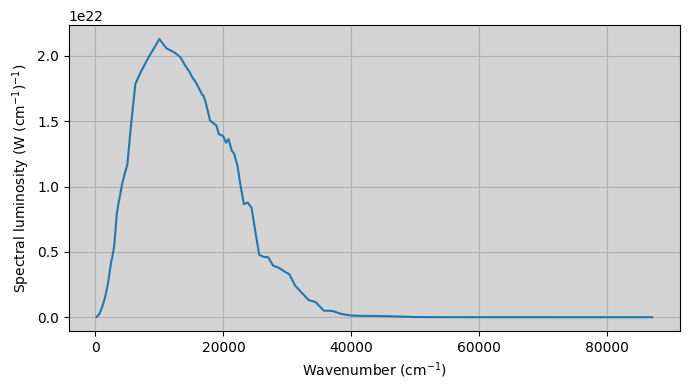

In [3]:
#Initialising class and reading HDF5 file
###################################################

Stellar = ans.Stellar_0()
Stellar.read_hdf5('example')

#Making summary plot
###################################################

fig,ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(Stellar.WAVE,Stellar.SOLSPEC)
ax1.grid()
if Stellar.ISPACE==0:
    ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax1.set_ylabel('Spectral luminosity (W (cm$^{-1}$)$^{-1}$)')
elif Stellar.ISPACE==1:
    ax1.set_xlabel('Wavelength ($\mu$m)')
    ax1.set_ylabel('Spectral luminosity (W $\mu$m$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

## 2. Writing the solar spectrum with the format of the input files

We can also use the Stellar class to write the information about our specific stellar spectrum into the input files requires by NEMESIS and archNEMESIS. In this section, we know how this is performed for each of the two cases.

### Creating a new stellar spectrum file

In NEMESIS, the *.sol* file just points to another file under *Data/stellar/* with the information about the stellar spectrum. There are several files stored in this repository, but we may want to create our own for our specific case. In particular, the  information we need to know include in the file is:

- *ISPACE*: Units of the stellar spectrum in wavenumber (cm$^{-1}$; *ISPACE*=0) or in wavelength ($\mu$m; *ISPACE*=1).
- *RADIUS*: Radius of the star (km)
- *WAVE*: Wavelength at which the solar spectrum is defined.
- *SOLSPEC*: Stellar luminosity (W (cm$^{-1})^{-1}$ or W $\mu$m).

In [4]:
#Initialising Stellar class
Stellar = ans.Stellar_0()

#Reading the .sol file
#Here we are reading the information from the .sol file but we may be getting it from other sources
Stellar.read_sol('solspec_wl')

#Writing the new stellar file
Stellar.write_solar_file('example_solar_file.txt')

### Writing the archNEMESIS HDF5 file

In archNEMESIS, we directly include the information about the stellar spectrum in the input HDF5 file, but the information we require is indeed the same. Note that the Planet-Star distance is another parameter in the Stellar class, and this information also needs to be defined to write the HDF5 file apart from the stellar spectrum itself.

In [5]:
#Initialising Stellar class
Stellar = ans.Stellar_0()

#Reading the .sol file
#Here we are reading the information from the .sol file but we may be getting it from other sources
Stellar.read_sol('solspec_wl')

#Defining the planet-star distance
Stellar.DIST = 1.0   #Earth distance

#Writing the HDF5 file
Stellar.write_hdf5('example_hdf5')

We may define the stellar spectrum ourselves, but we may also want to use the information in the *Data/stellar/* files used by NEMESIS. In this case, we just need use the optional input *solfile* in the Stellar.*write_hdf5()* method.

Here, we are going to write the information in the *solspec_tsis1-sim.dat* file under *Data/stellar/*.

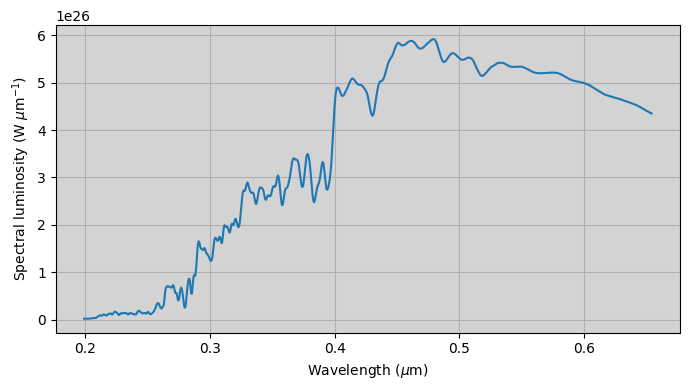

In [6]:
#Initialising Stellar class
Stellar = ans.Stellar_0()

#Defining the planet-star distance
Stellar.DIST = 1.0   #Earth distance

#Writing the information into HDF5 file
Stellar.write_hdf5('example_hdf5',solfile='solspec_tsis1-sim.dat')

#Reading the HDF5 file
Stellar.read_hdf5('example_hdf5')

#Making plot of the spectrum
fig,ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.plot(Stellar.WAVE,Stellar.SOLSPEC)
ax1.grid()
if Stellar.ISPACE==0:
    ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax1.set_ylabel('Spectral luminosity (W (cm$^{-1}$)$^{-1}$)')
elif Stellar.ISPACE==1:
    ax1.set_xlabel('Wavelength ($\mu$m)')
    ax1.set_ylabel('Spectral luminosity (W $\mu$m$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()

## 3. Calculating the solar irradiance at a given distance

Once the stellar spectrum has been read, the stellar flux or irradiance at a given distance to the star can be easily calculated following

\begin{equation}
F(\lambda,d) = \dfrac{P(\lambda)}{4 \pi d^2},
\end{equation}

where $P(\lambda)$ is the stellar spectral luminosity and $d$ is the distance from the planet to the star. This calculation can be performed in the Stellar class using the method *calc_solar_flux()*, and the information about this parameter is stored under Stellar.*SOLFLUX*.

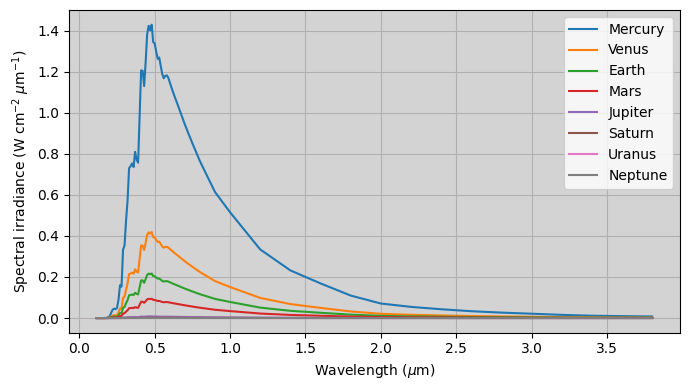

In [7]:
#Initialising Stellar class
Stellar = ans.Stellar_0()

#Reading the .sol file
Stellar.read_sol('solspec_wl')

#Defining a range of planet-Sun distances 
dist = [0.39,0.72,1.,1.52,5.2,9.54,19.22,30.06]
labels = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

#Making a plot with the flux at the different planets
fig,ax1 = plt.subplots(1,1,figsize=(7,4))

for i in range(8):

    #Defining the distance to star
    Stellar.DIST = dist[i]   #Planet-Star distance in Astronomical Units

    #Calculating the flux
    Stellar.calc_solar_flux()

    ax1.plot(Stellar.WAVE,Stellar.SOLFLUX,label=labels[i])
    
ax1.grid()
ax1.legend()
#ax1.set_yscale('log')
if Stellar.ISPACE==0:
    ax1.set_xlabel('Wavenumber (cm$^{-1}$)')
    ax1.set_ylabel('Spectral irradiance (W cm$^{-2}$ (cm$^{-1}$)$^{-1}$)')
elif Stellar.ISPACE==1:
    ax1.set_xlabel('Wavelength ($\mu$m)')
    ax1.set_ylabel('Spectral irradiance (W cm$^{-2}$ $\mu$m$^{-1}$)')
ax1.set_facecolor('lightgray')
plt.tight_layout()